In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv('A:/ExcelR Assi/Assi5....Multi-linear regression/50_Startups.csv')


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.rename(columns={'R&D Spend':'RnDspend'},inplace=True)

In [5]:
data.rename(columns={'Marketing Spend':'MarketSpend'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDspend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketSpend     50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Checking for null values

In [7]:
data.isna().sum()

RnDspend          0
Administration    0
MarketSpend       0
State             0
Profit            0
dtype: int64

### Correlation matrix

In [8]:
data.corr()

,RnDspend,Administration,MarketSpend,Profit
RnDspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Scatterplot between variables a;long with histogram

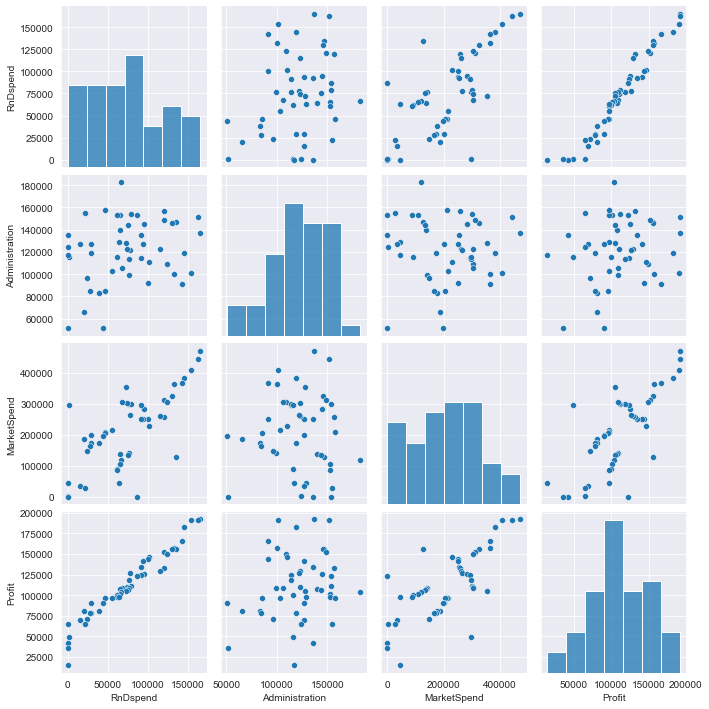

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

### Preparing a model

In [10]:
model = smf.ols('Profit~MarketSpend+Administration+RnDspend',data=data).fit()

In [11]:
#Coefficients
model.params

Intercept         50122.192990
MarketSpend           0.027228
Administration       -0.026816
RnDspend              0.805715
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
MarketSpend        1.655077
Administration    -0.525507
RnDspend          17.846374
dtype: float64 
 Intercept         1.057379e-09
MarketSpend       1.047168e-01
Administration    6.017551e-01
RnDspend          2.634968e-22
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Simple Linear Regression Models

In [14]:
ml_m=smf.ols('Profit~MarketSpend',data = data).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept      7.808356
MarketSpend    7.802657
dtype: float64 
 Intercept      4.294735e-10
MarketSpend    4.381073e-10
dtype: float64


In [15]:
ml_a=smf.ols('Profit~Administration',data = data).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [16]:
ml_ma=smf.ols('Profit~MarketSpend+Administration',data = data).fit()  
print(ml_ma.tvalues, '\n', ml_ma.pvalues) 

Intercept         1.142741
MarketSpend       8.281039
Administration    2.467779
dtype: float64 
 Intercept         2.589341e-01
MarketSpend       9.727245e-11
Administration    1.729198e-02
dtype: float64


### Model Validation

### Two Techniques: 1.Collinearity check, 2.Residual Analysis

In [17]:
# 1) Colinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r = smf.ols('RnDspend~MarketSpend+Administration',data=data).fit().rsquared  
vif_r = 1/(1-rsq_r) 

rsq_m = smf.ols('MarketSpend~RnDspend+Administration',data=data).fit().rsquared  
vif_m = 1/(1-rsq_m) 

rsq_a = smf.ols('Administration~RnDspend+MarketSpend',data=data).fit().rsquared  
vif_a = 1/(1-rsq_a) 


# Storing vif values in a data frame
d1 = {'Variables':['RnDspend','MarketSpend','Administration'],'VIF':[vif_r,vif_m,vif_a]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnDspend,2.468903
1,MarketSpend,2.326773
2,Administration,1.175091


In [18]:
# None variable has VIF>20, No collinearity, so consider all variables in Regression equation

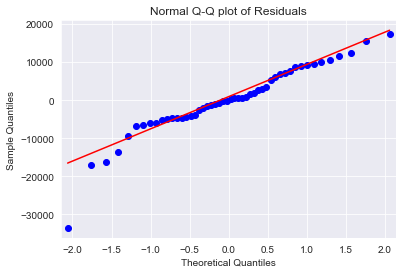

In [19]:
# 2) Residual analysis
# Test for Normally of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [20]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [21]:
# Test for Homoscedasticity or Heteroscedasticity(plotting models standardizes fitted values vs standardized residual values)
def standard_values(vals):
    return (vals-vals.mean())/vals.std()

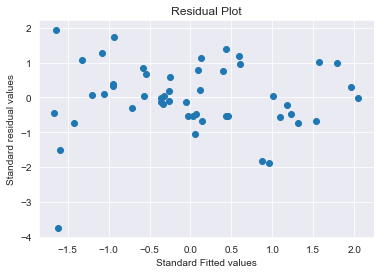

In [22]:
plt.scatter(standard_values(model.fittedvalues),
            standard_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standard Fitted values')
plt.ylabel('Standard residual values')
plt.show()

### Residual Vs Regressor

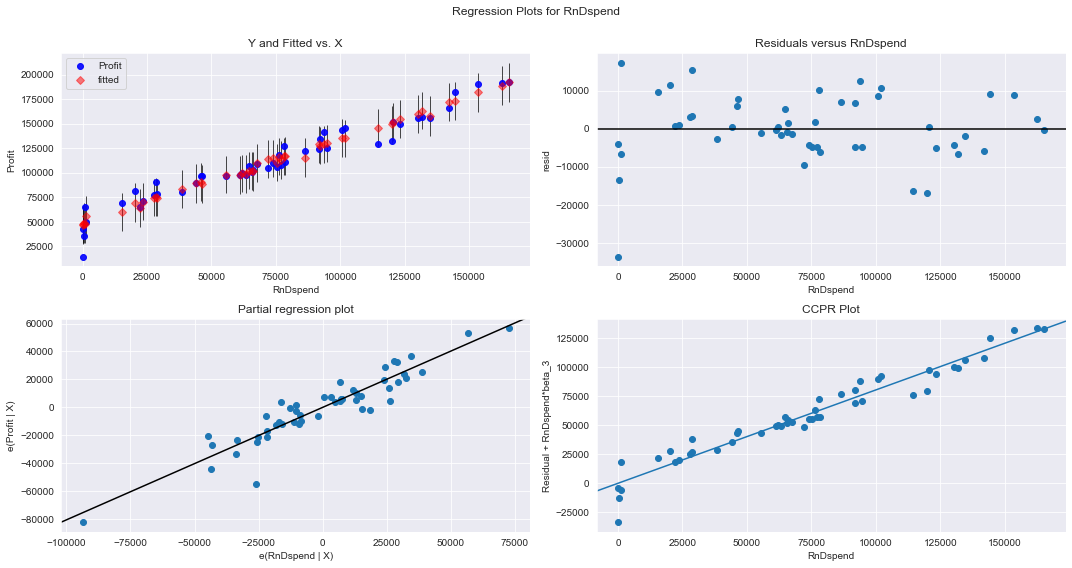

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnDspend", fig=fig)
plt.show()

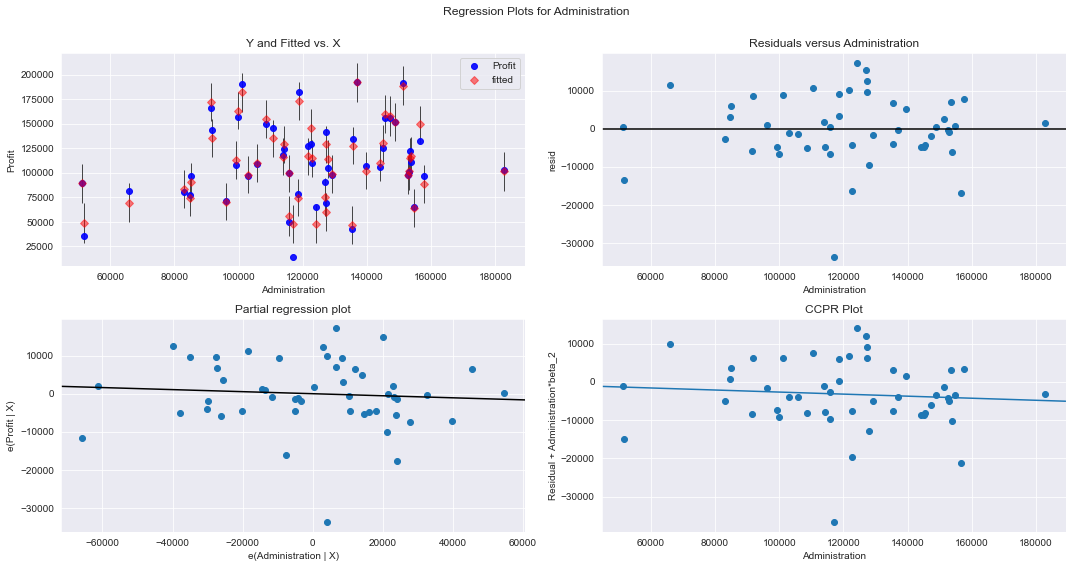

In [24]:
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig1)

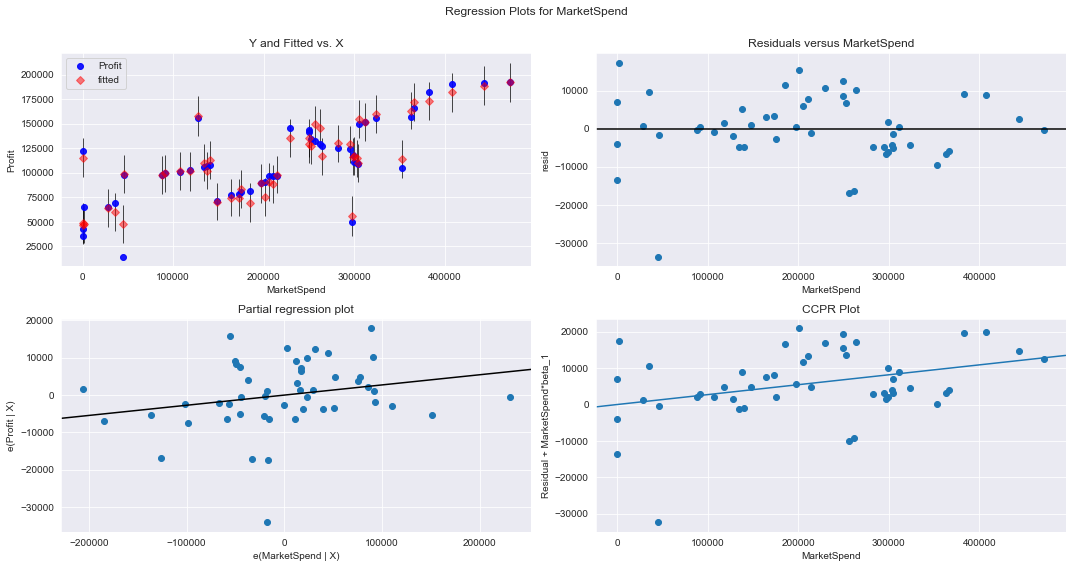

In [25]:
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(model, 'MarketSpend', fig=fig2)

### Model Deletion Diagnostics (checking Outliers or influencers)

### Two Technique: 1: Cook's Distance 2: Leverage value

### 1) Cook's Distance

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

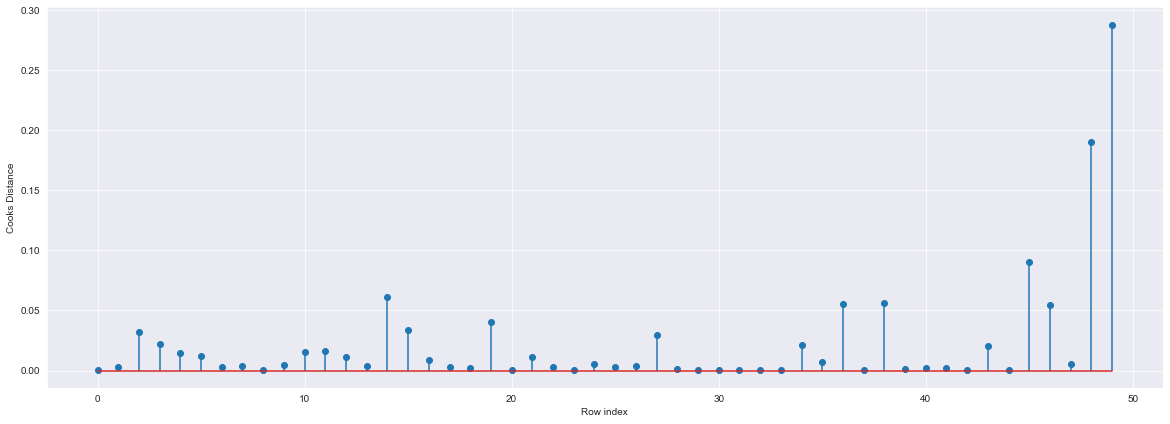

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543262)

### High Influence points

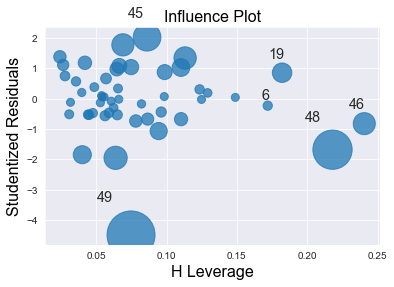

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
# Leverage Cuttoff value = 3*(k+1)/n;
# k = no of features/columns
# n = no of datapoints

0.36

### From the above influencer plot we can say that, 49 is a infulencer

In [31]:
data[data.index.isin([49])]

,RnDspend,Administration,MarketSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


### Improving the model

In [32]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1 = pd.read_csv("A:/ExcelR Assi/Assi5....Multi-linear regression/50_Startups.csv")
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)

In [33]:
data2.rename(columns={'R&D Spend':'RnDspend'},inplace=True)

In [34]:
data2.rename(columns={'Marketing Spend':'MarketSpend'},inplace=True)

In [35]:
data2

,RnDspend,Administration,MarketSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Build Model

In [36]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_P= smf.ols('Profit~MarketSpend+Administration+RnDspend',data = data2).fit()

In [37]:
(final_ml_P.rsquared,final_ml_P.aic)

(0.9613162435129847, 1020.5652974526366)

### Thus model accuracy is improved to 0.96

### For new data Predicition

In [38]:
new_data = pd.DataFrame({'RnDspend':70000,'Administration':90000, 'MarketSpend': 140000}, index=[0])
new_data

,RnDspend,Administration,MarketSpend
0,70000,90000,140000


### Manually Prediction of Price

In [39]:
final_ml_P.predict(new_data)

0    108727.154753
dtype: float64

In [40]:
pred_y = final_ml_P.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64